### 1. iris 예제

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 샘플 데이터

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target, columns=["label"])

# 4차원
features = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])

# 2차원
features = features[['sl', 'sw']]

datas = pd.concat([features, labels], axis=1)

datas.tail(2)

,sl,sw,label
148,6.2,3.4,2
149,5.9,3.0,2


#### 1.2 모델 학습
- kmeans
- dbscan

#### K-means

In [4]:
from sklearn.cluster import KMeans

# kmeans : 모델 객체 생성
model_km = KMeans(n_clusters = 3, random_state=0).fit(features)

# 예측 데이터 생성
pred_datas_km = model_km.fit_predict(features)

# features와 예측 데이터를 데이터 프레임으로 생성
pred_df_km = pd.DataFrame(pred_datas_km, columns=['predict'])

# feature 데이터와 predict 데이터와 결합
pred_df_km = pd.concat([features, pred_df_km], axis=1)

pred_df_km.tail(2)

,sl,sw,predict
148,6.2,3.4,2
149,5.9,3.0,0


#### DBSCAN

In [5]:
from sklearn.cluster import DBSCAN

# 모델 객체 생성
model_ds = DBSCAN(eps=0.3)

# 예측 데이터 생성
pred_datas_ds = model_ds.fit_predict(features)

# features와 예측 데이터를 데이터 프레임으로 생성
pred_df_ds = pd.DataFrame(pred_datas_ds, columns=['predict'])
pred_df_ds = pd.concat([features, pred_df_ds], axis=1)

pred_df_ds.tail(2)

,sl,sw,predict
148,6.2,3.4,1
149,5.9,3.0,1


#### 1.3 데이터 시각화
- 실제 데이터
- K-means 데이터
- DBSCAN 데이터

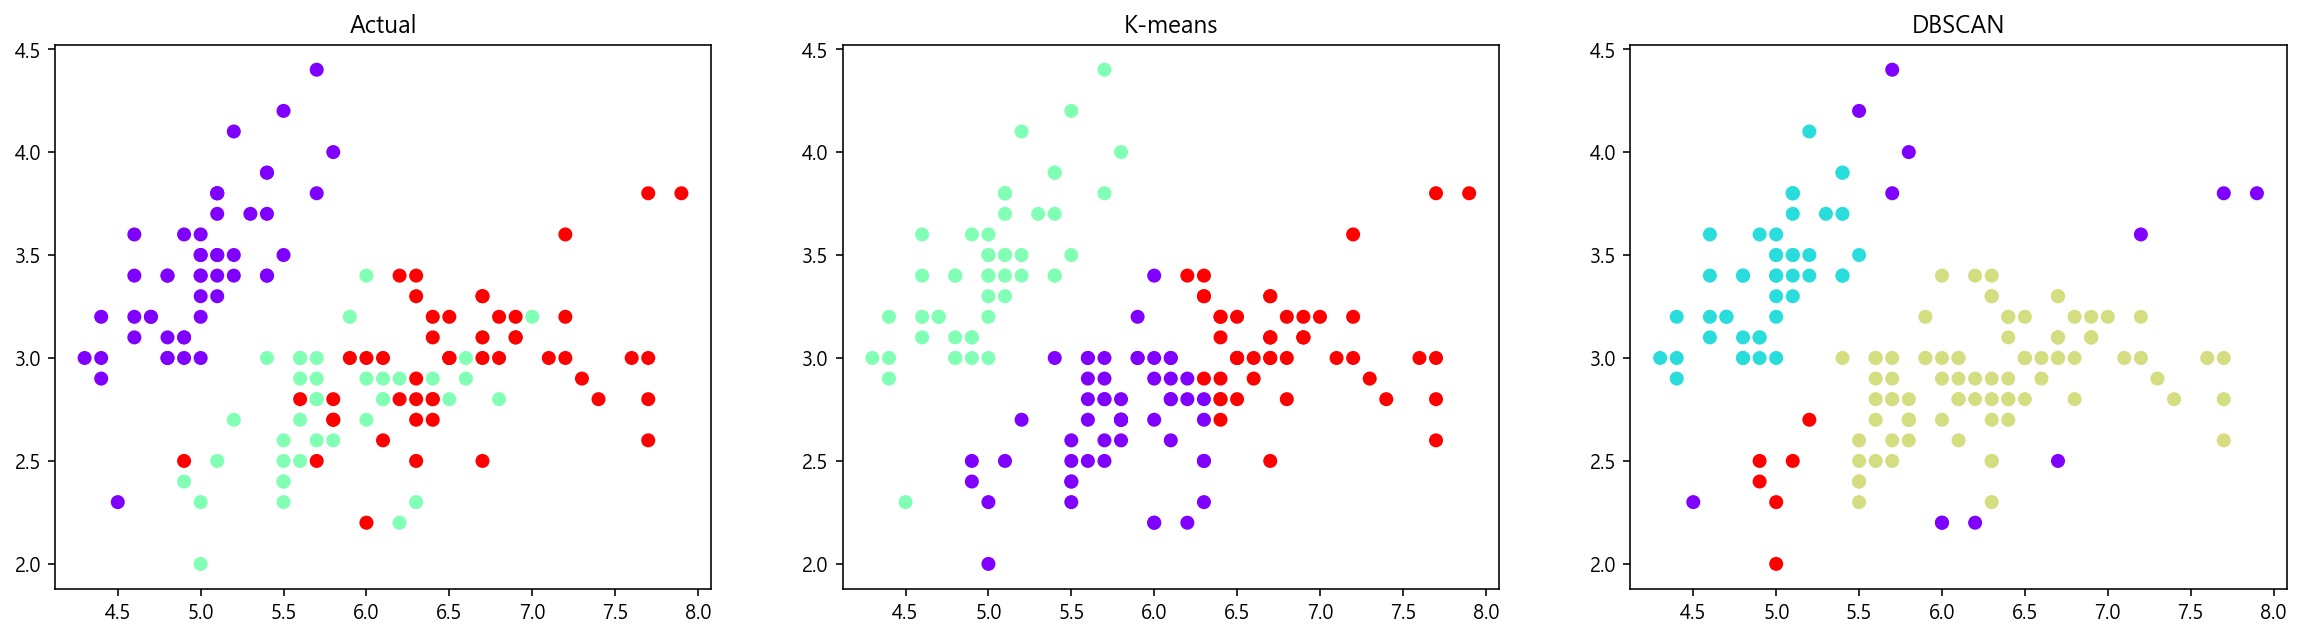

In [6]:
plt.figure(figsize=(20, 5))

# 실제 데이터 시각화
plt.subplot(131)
plt.scatter(datas["sl"], datas["sw"], c=datas["label"], cmap="rainbow")
plt.title("Actual")

# K-means 데이터 시각화
plt.subplot(132)
plt.scatter(pred_df_km["sl"], pred_df_km["sw"], c=pred_df_km["predict"], cmap="rainbow")
plt.title("K-means")

# DBSCAN 데이터 시각화
plt.subplot(133)
plt.scatter(pred_df_ds["sl"], pred_df_ds["sw"], c=pred_df_ds["predict"], cmap="rainbow")
plt.title("DBSCAN")

plt.show()

#### 1.4 결과 비교
- DBSCAN 보다 K-means가 성능이 더 좋음
- 데이터의 특징에 맞게 알맞은 알고리즘을 사용

### 2. HDBSCAN 
- Hierarchical DBSCAN (계층적 DBSCAN)
- 하이퍼 파라미터에 덜 민감한 DBSCAN 알고리즘
- `https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html`
    - min_cluster_size를 기준으로 클러스터를 생성
    - 생성된 클러스터의 core 데이터와 다른 클러스터의 core 데이터의 거리에 대한 계층을 만듦

#### 1. 샘플 데이터

In [7]:
datas = np.load('./data/clusterable_data.npy')
len(datas)

2309

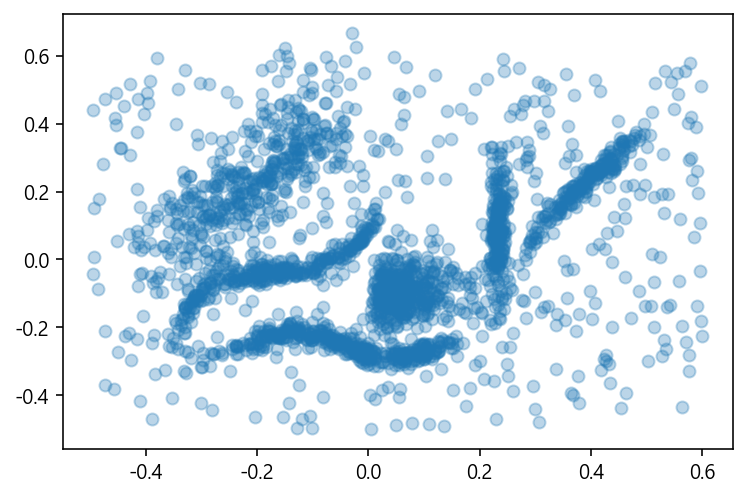

In [8]:
plt.scatter(datas.T[0], datas.T[1], alpha=0.3)
plt.show()

#### 2. k-means 

In [9]:
from sklearn.cluster import KMeans

# kmeans : 모델 객체 생성
model_km = KMeans(n_clusters=6, random_state=0).fit(datas)

# 예측 데이터 생성
pred_km = model_km.fit_predict(datas)

# 데이터 프레임 만들기
df = pd.DataFrame(datas)
df["labels"] = pred_km

df.tail(2)

,0,1,labels
2307,0.538223,0.194122,1
2308,-0.086889,-0.209272,5


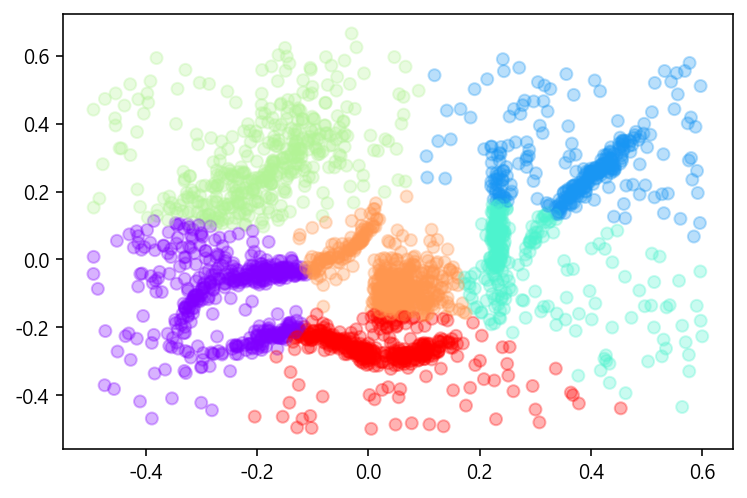

In [10]:
# 그래프 그리기
plt.scatter(df[0], df[1], c=df["labels"], cmap="rainbow", alpha=0.3)
plt.show()

#### 3. DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

# 모델 객체 생성
model_ds = DBSCAN(eps=0.02, min_samples=3).fit(datas)

# 예측 데이터 생성
pred_ds = model_ds.fit_predict(datas)

# 데이터 프레임 만들기
df = pd.DataFrame(datas)
df["labels"] = pred_ds

df.tail(2)

,0,1,labels
2307,0.538223,0.194122,27
2308,-0.086889,-0.209272,0


In [12]:
df_sort = df.groupby("labels").size().reset_index(name="count")
df_sort = df_sort.sort_values("count", ascending=False)
filterd_labels = df_sort["labels"][:10].values
filterd_labels

array([ 0,  3, -1, 13, 10, 11,  5, 14, 25,  1], dtype=int64)

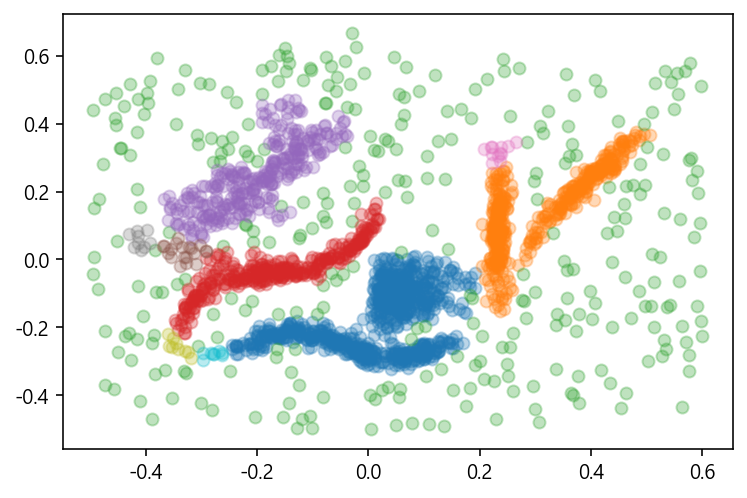

In [13]:
# 그래프 그리기
for label in filterd_labels:
    
    data = df[df["labels"] == label]
    plt.scatter(data[0], data[1], alpha=0.3)
    
plt.show()

#### 4. HDBSCAN
- sklearn에 없기 때문에 패키지 설치가 필요
    - `$ pip install hdbscan`

In [25]:
conda install -c conda-forge hdbscan

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gmlkd\miniforge3\envs\fastcampus

  added / updated specs:
    - hdbscan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       h5b45459_0         180 KB  conda-forge
    certifi-2022.5.18.1        |   py38haa244fe_0         151 KB  conda-forge
    hdbscan-0.8.28             |   py38h6f4d8f0_1         496 KB  conda-forge
    openssl-1.1.1o             |       h8ffe710_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following NEW packages will be INSTALLED:

  hdbscan            conda-forge/win-64::hdbscan-0.8.28-py38h6f4d8f0_1

The following packages will be UPDATED:

  ca-certificates                      2021.10.8-h5b45459_0 --> 2022.5.18.1-h5b45459



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda




In [26]:
import hdbscan

In [27]:
from sklearn.cluster import DBSCAN

# 모델 객체 생성
model_hds = hdbscan.HDBSCAN(min_cluster_size=25).fit(datas)

# 예측 데이터 생성
pred_hds = model_hds.fit_predict(datas)

# 데이터 프레임 만들기
df = pd.DataFrame(datas)
df["labels"] = pred_hds

df.tail(2)

,0,1,labels
2307,0.538223,0.194122,-1
2308,-0.086889,-0.209272,4


In [28]:
np.unique(df["labels"])

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

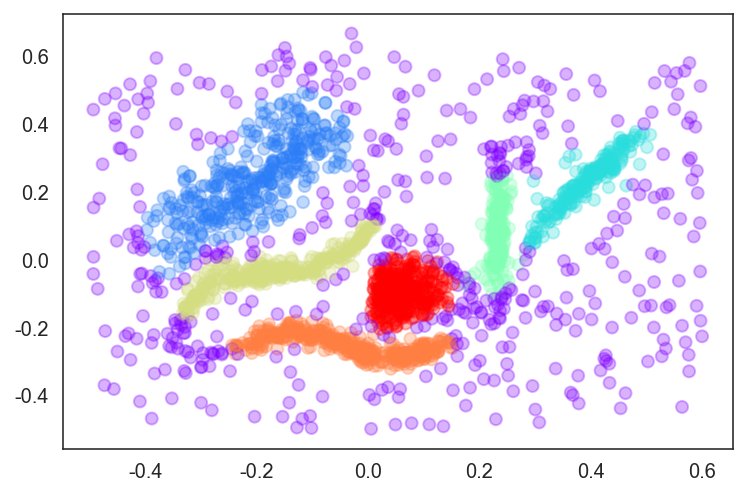

In [29]:
# 그래프 그리기
plt.scatter(df[0], df[1], c=df["labels"], cmap="rainbow", alpha=0.3)
plt.show()

### 3. HDBSCAN 예시

In [30]:
import sklearn.datasets as data
import hdbscan

In [31]:
# 그래프 설정
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

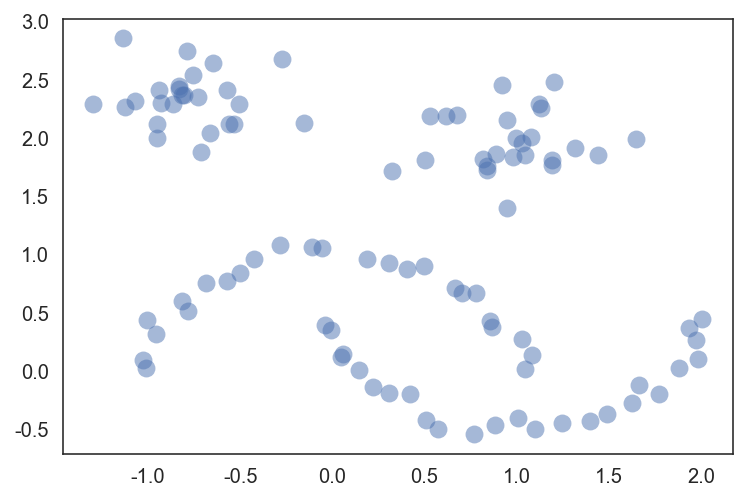

In [32]:
# 샘플 데이터 생성
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [33]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

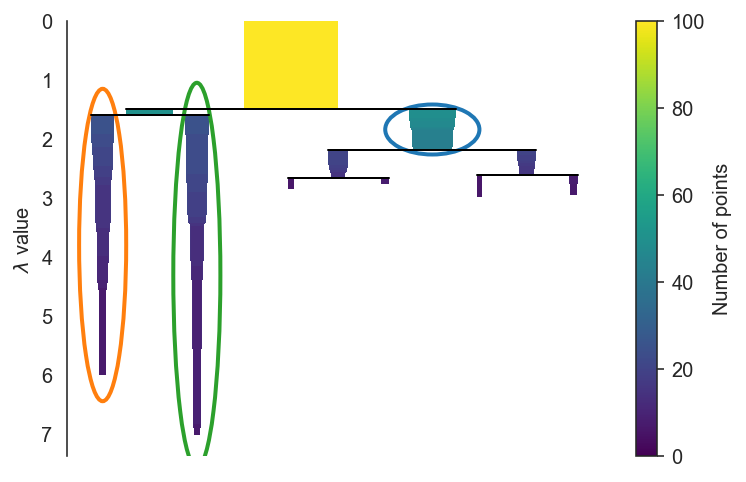

In [34]:
# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

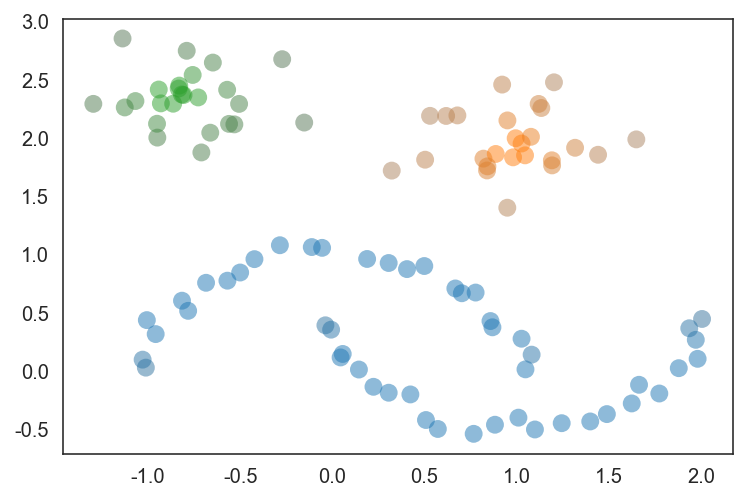

In [36]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.show()

#### DBSCAN과 HDBSCAN의 비교

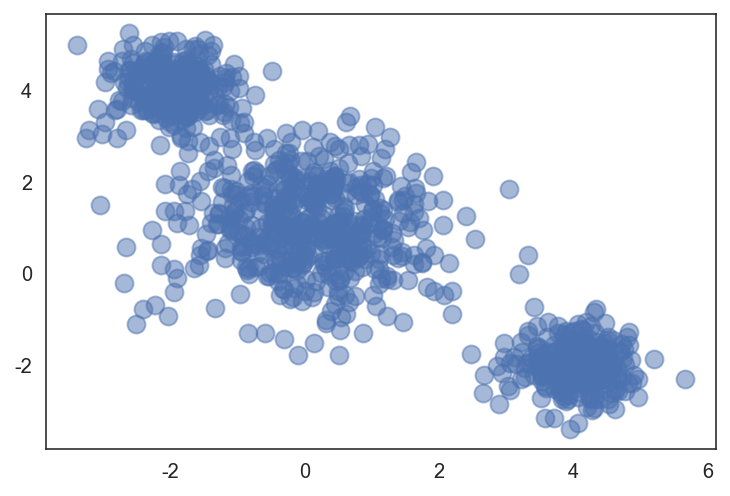

In [37]:
num = 500

# 표준편차가 0.25, 중심이 2개인 데이터 200개 생성
blobs1, _ = data.make_blobs(n_samples=num, centers=[(-2, 4), (4, -2)], cluster_std=0.5, random_state=1)

# 표준편차가 4, 중심이 1개인 데이터 200개 생성
blobs2, _ = data.make_blobs(n_samples=num, centers=[(0, 1)], cluster_std=1, random_state=1)

# 두개의 데이터를 합침
test_data = np.vstack([blobs1, blobs2])

# 그래프 그리기
plt.scatter(test_data.T[0], test_data.T[1], color='b', s=80, alpha=0.5)

plt.show()

In [38]:
# DBSCAN 모델 학습 : eps 값을 찾기가 어렵다.
model_ds = DBSCAN(eps=0.26, min_samples=3).fit(test_data)

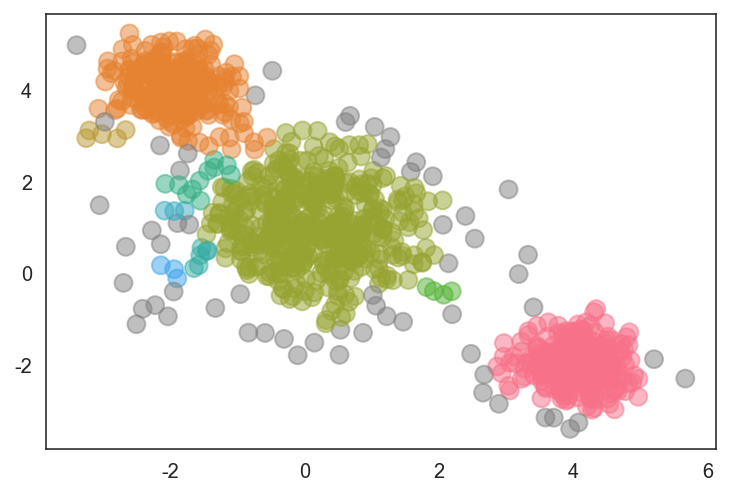

In [39]:
palette = sns.color_palette("husl", 12)

cluster_colors = [palette[col] if col >= 0 else (0.5, 0.5, 0.5) for col in model_ds.labels_]
                    
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, s=80, alpha=0.5)
plt.show()

In [40]:
# HDBSCAN 모델 학습 : min_cluster_size를 설정하는것이 eps 설정하는것 보다 쉽다.
model_hds = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True).fit(test_data)

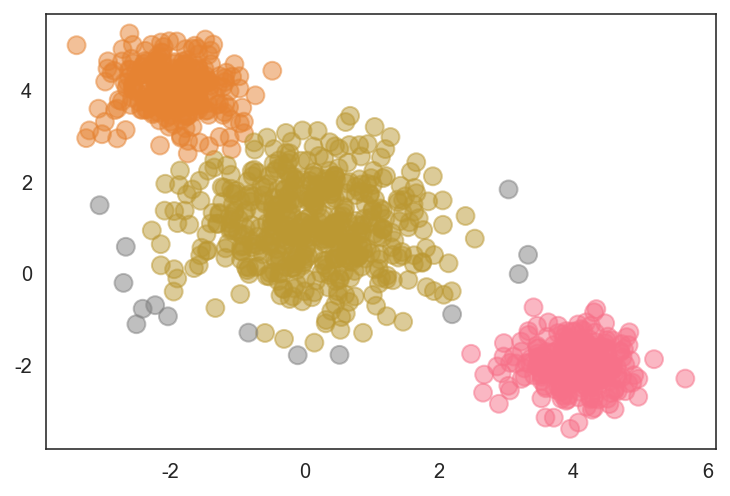

In [41]:
palette = sns.color_palette("husl", 12)

cluster_colors = [palette[col] if col >= 0 else (0.5, 0.5, 0.5) for col in model_hds.labels_]

plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, s=80, alpha=0.5)
plt.show()